# 1.가설 세우기

### 1.1 K-Beauty는 성장하고 있는가?

### 1.2 성장하고 있다면 해외 판매를 하고자 할때 어느 국가로 판매전략을 세우면 되는가?

# 2.데이터 준비

### 2.1 라이브러리 임포트하기

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [99]:
import os
os.name

if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

### 2.2 데이터셋 로드하기

In [100]:
df = pd.read_csv('./data/101_DT_1KE10081_20231106160107.csv', encoding='cp949')
df.shape

(969, 30)

In [101]:
df['지역별'].value_counts()

합계         51
유럽         51
아프리카       51
중남미        51
대양주        51
기타 유럽      51
영국         51
유럽연합       51
유럽연합+영국    51
캐나다        51
아시아        51
미국         51
북미         51
기타 아시아     51
중동         51
아세안        51
일본         51
중국         51
기타         51
Name: 지역별, dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지역별          969 non-null    object 
 1   상품군별         969 non-null    object 
 2   판매유형별        969 non-null    object 
 3   항목           969 non-null    object 
 4   단위           969 non-null    object 
 5   2014.1/4     150 non-null    float64
 6   2014.2/4     150 non-null    float64
 7   2014.3/4     150 non-null    float64
 8   2014.4/4     150 non-null    float64
 9   2015.1/4     150 non-null    float64
 10  2015.2/4     150 non-null    float64
 11  2015.3/4     150 non-null    float64
 12  2015.4/4     150 non-null    float64
 13  2016.1/4     150 non-null    float64
 14  2016.2/4     150 non-null    float64
 15  2016.3/4     150 non-null    float64
 16  2016.4/4     150 non-null    float64
 17  2017.1/4     969 non-null    object 
 18  2017.2/4     969 non-null    object 
 19  2017.3/4

In [103]:
df.describe().head()

,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,2015.4/4,2016.1/4,2016.2/4,2016.3/4,2016.4/4,Unnamed: 29
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,0.0
mean,3953.920000,4097.093333,4373.306667,5685.760000,7176.026667,7247.573333,7157.893333,12015.146667,13637.20000,13183.760000,14956.080000,19379.760000,NaN
std,14316.406803,15294.262587,16484.779102,22380.618718,30202.367950,31248.705252,30332.916978,55268.962799,64518.94157,61849.273377,73675.967574,96241.769115,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN
25%,93.250000,88.000000,102.250000,109.000000,113.750000,108.000000,102.000000,67.000000,82.75000,72.750000,70.750000,77.750000,NaN


# 3.데이터 전처리

### 3.1 컬럼명 "지역별"을 "국가(대륙) 별"로 수정하기

In [104]:
df.rename(columns={'지역별':'국가(대륙)별'}, inplace=True)
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '항목', '단위', '2014.1/4', '2014.2/4',
       '2014.3/4', '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4',
       '2016.1/4', '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4',
       '2017.3/4', '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4',
       '2019.1/4', '2019.2/4', '2019.3/4', '2019.4/4', 'Unnamed: 29'],
      dtype='object')

### 3.1 필요없는 컬럼 삭제하기 - '항목', '단위', 'Unnamed: 29'

In [105]:
df = df.drop(['항목', '단위', 'Unnamed: 29'], axis=1)
df.shape

(969, 27)

In [106]:
df.head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
0,합계,합계,계,148272.0,153641.0,163999.0,213216.0,269101.0,271784.0,268421.0,...,755101,858240,833672,897205,921586,974060,1251122,1345723,1526135,1881628
1,합계,합계,면세점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635
2,합계,합계,면세점 이외,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,144471,180356,168059,171886,159750,203404,180429,188565,189763,225993
3,합계,컴퓨터 및 주변기기,계,4915.0,4052.0,3912.0,3529.0,2903.0,2697.0,3804.0,...,2032,2158,5236,3854,4320,4511,3702,4038,3670,3827
4,합계,컴퓨터 및 주변기기,면세점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,1,2,6,1,215,2,0,1,70


### 3.2 melt 함수를 활용해서 tidy data로 구성하기

In [107]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

In [108]:
print(df['상품군별'].value_counts())
print("-" * 100)
print(df['판매유형별'].value_counts())

합계               57
의류 및 패션 관련 상품    57
생활·자동차용품         57
농축수산물            57
음·식료품            57
아동·유아용품          57
화장품              57
스포츠·레저용품         57
음반·비디오·악기        57
컴퓨터 및 주변기기       57
사무·문구            57
서 적              57
소프트웨어            57
통신기기             57
가전·전자            57
가전·전자·통신기기       57
기 타              57
Name: 상품군별, dtype: int64
----------------------------------------------------------------------------------------------------
계         323
면세점       323
면세점 이외    323
Name: 판매유형별, dtype: int64


In [109]:
df_new = df.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], var_name='기간', value_name='백만원')
df_new.shape

(23256, 5)

In [110]:
df_new.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272.0
1,합계,합계,면세점,2014.1/4,NaN
2,합계,합계,면세점 이외,2014.1/4,NaN
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN


In [111]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  23256 non-null  object
 1   상품군별     23256 non-null  object
 2   판매유형별    23256 non-null  object
 3   기간       23256 non-null  object
 4   백만원      13428 non-null  object
dtypes: object(5)
memory usage: 908.6+ KB


### 3.3 기간에서 연도 분리하기

In [112]:
df_new['연도'] = df_new['기간'].map(lambda x: int(x.split('.')[0]))
df_new

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272.0,2014
1,합계,합계,면세점,2014.1/4,NaN,2014
2,합계,합계,면세점 이외,2014.1/4,NaN,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014
...,...,...,...,...,...,...
23251,기타,생활·자동차용품,면세점,2019.4/4,0,2019
23252,기타,생활·자동차용품,면세점 이외,2019.4/4,531,2019
23253,기타,기 타,계,2019.4/4,1094,2019
23254,기타,기 타,면세점,2019.4/4,1,2019


### 3.4 기간에서 분기 분리하기

In [113]:
df_new['분기'] = df_new['기간'].map(lambda x: int(str(x.split('.')[1]).split('/')[0]))
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  23256 non-null  object
 1   상품군별     23256 non-null  object
 2   판매유형별    23256 non-null  object
 3   기간       23256 non-null  object
 4   백만원      13428 non-null  object
 5   연도       23256 non-null  int64 
 6   분기       23256 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.2+ MB


### 3.5 금액을 수치 데이터로 표현하기 위해 데이터 타입 변경

In [21]:
df_new['백만원'] = df_new['백만원'].replace('-', pd.np.nan).astype(dtype='float64')

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_58086/2284103331.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_new['백만원'] = df_new['백만원'].replace('-', pd.np.nan).astype(dtype='float64')


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  23256 non-null  object 
 1   상품군별     23256 non-null  object 
 2   판매유형별    23256 non-null  object 
 3   기간       23256 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       23256 non-null  int64  
 6   분기       23256 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [23]:
df_new.replace({np.nan:0}, inplace=True)
df_new

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,0.0,2014,1
2,합계,합계,면세점 이외,2014.1/4,0.0,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,0.0,2014,1
...,...,...,...,...,...,...,...
23251,기타,생활·자동차용품,면세점,2019.4/4,0.0,2019,4
23252,기타,생활·자동차용품,면세점 이외,2019.4/4,531.0,2019,4
23253,기타,기 타,계,2019.4/4,1094.0,2019,4
23254,기타,기 타,면세점,2019.4/4,1.0,2019,4


### 3.6 필요없는 데이터 제거하기

In [24]:
df_new = df_new[(df_new['국가(대륙)별'] != '합계') & (df_new['상품군별'] != '합계')].copy()
df_new

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
54,아시아,컴퓨터 및 주변기기,계,2014.1/4,0.0,2014,1
55,아시아,컴퓨터 및 주변기기,면세점,2014.1/4,0.0,2014,1
56,아시아,컴퓨터 및 주변기기,면세점 이외,2014.1/4,0.0,2014,1
57,아시아,가전·전자·통신기기,계,2014.1/4,0.0,2014,1
58,아시아,가전·전자·통신기기,면세점,2014.1/4,0.0,2014,1
...,...,...,...,...,...,...,...
23251,기타,생활·자동차용품,면세점,2019.4/4,0.0,2019,4
23252,기타,생활·자동차용품,면세점 이외,2019.4/4,531.0,2019,4
23253,기타,기 타,계,2019.4/4,1094.0,2019,4
23254,기타,기 타,면세점,2019.4/4,1.0,2019,4


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20736 entries, 54 to 23255
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  20736 non-null  object 
 1   상품군별     20736 non-null  object 
 2   판매유형별    20736 non-null  object 
 3   기간       20736 non-null  object 
 4   백만원      20736 non-null  float64
 5   연도       20736 non-null  int64  
 6   분기       20736 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ MB


In [26]:
df_new.isnull().sum()

국가(대륙)별    0
상품군별       0
판매유형별      0
기간         0
백만원        0
연도         0
분기         0
dtype: int64

# 4.전체 상품군별 시각화

### 4.1 전체 상품군 판매액 시각화

#### 4.1.1 판매유형별이 "계"인 데이터만 가져오기

In [27]:
df_total = df_new[df_new['판매유형별'] == '계'].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
54,아시아,컴퓨터 및 주변기기,계,2014.1/4,0.0,2014,1
57,아시아,가전·전자·통신기기,계,2014.1/4,0.0,2014,1
60,아시아,가전·전자,계,2014.1/4,0.0,2014,1
63,아시아,통신기기,계,2014.1/4,0.0,2014,1
66,아시아,소프트웨어,계,2014.1/4,0.0,2014,1


#### 4.1.2 lineplot

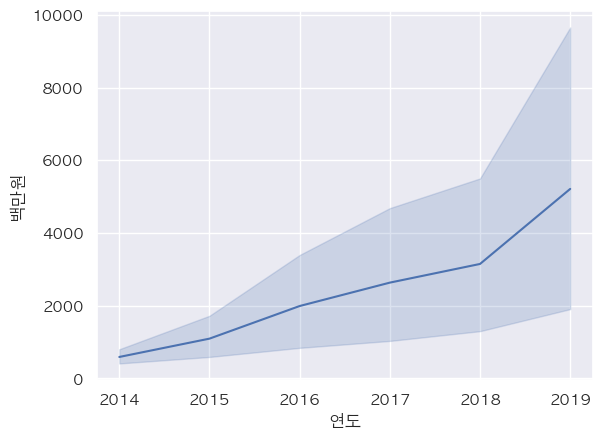

In [28]:
sns.lineplot(data=df_total, x='연도', y='백만원')
plt.show()

#### 4.1.2 "상품군별"별 다른 색상을 가지는 lineplot

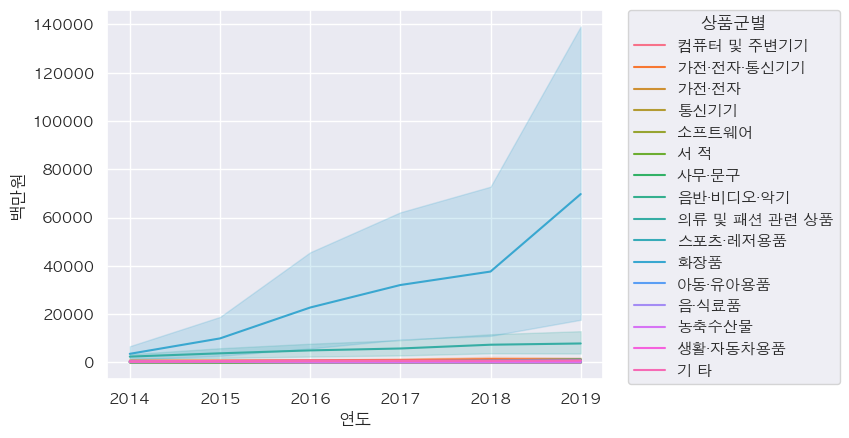

In [29]:
sns.lineplot(data=df_total, x='연도', y='백만원', hue='상품군별')
plt.legend(title="상품군별", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 4.1.3 relplot

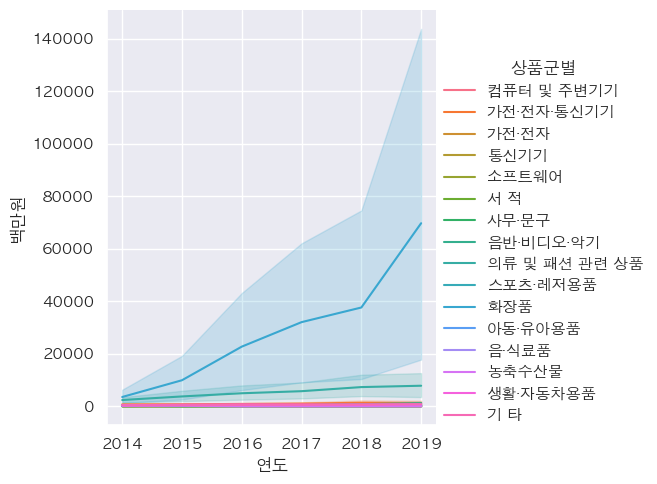

In [30]:
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line")

#### 4.1.4 상품군별 각각의 replot 그리기

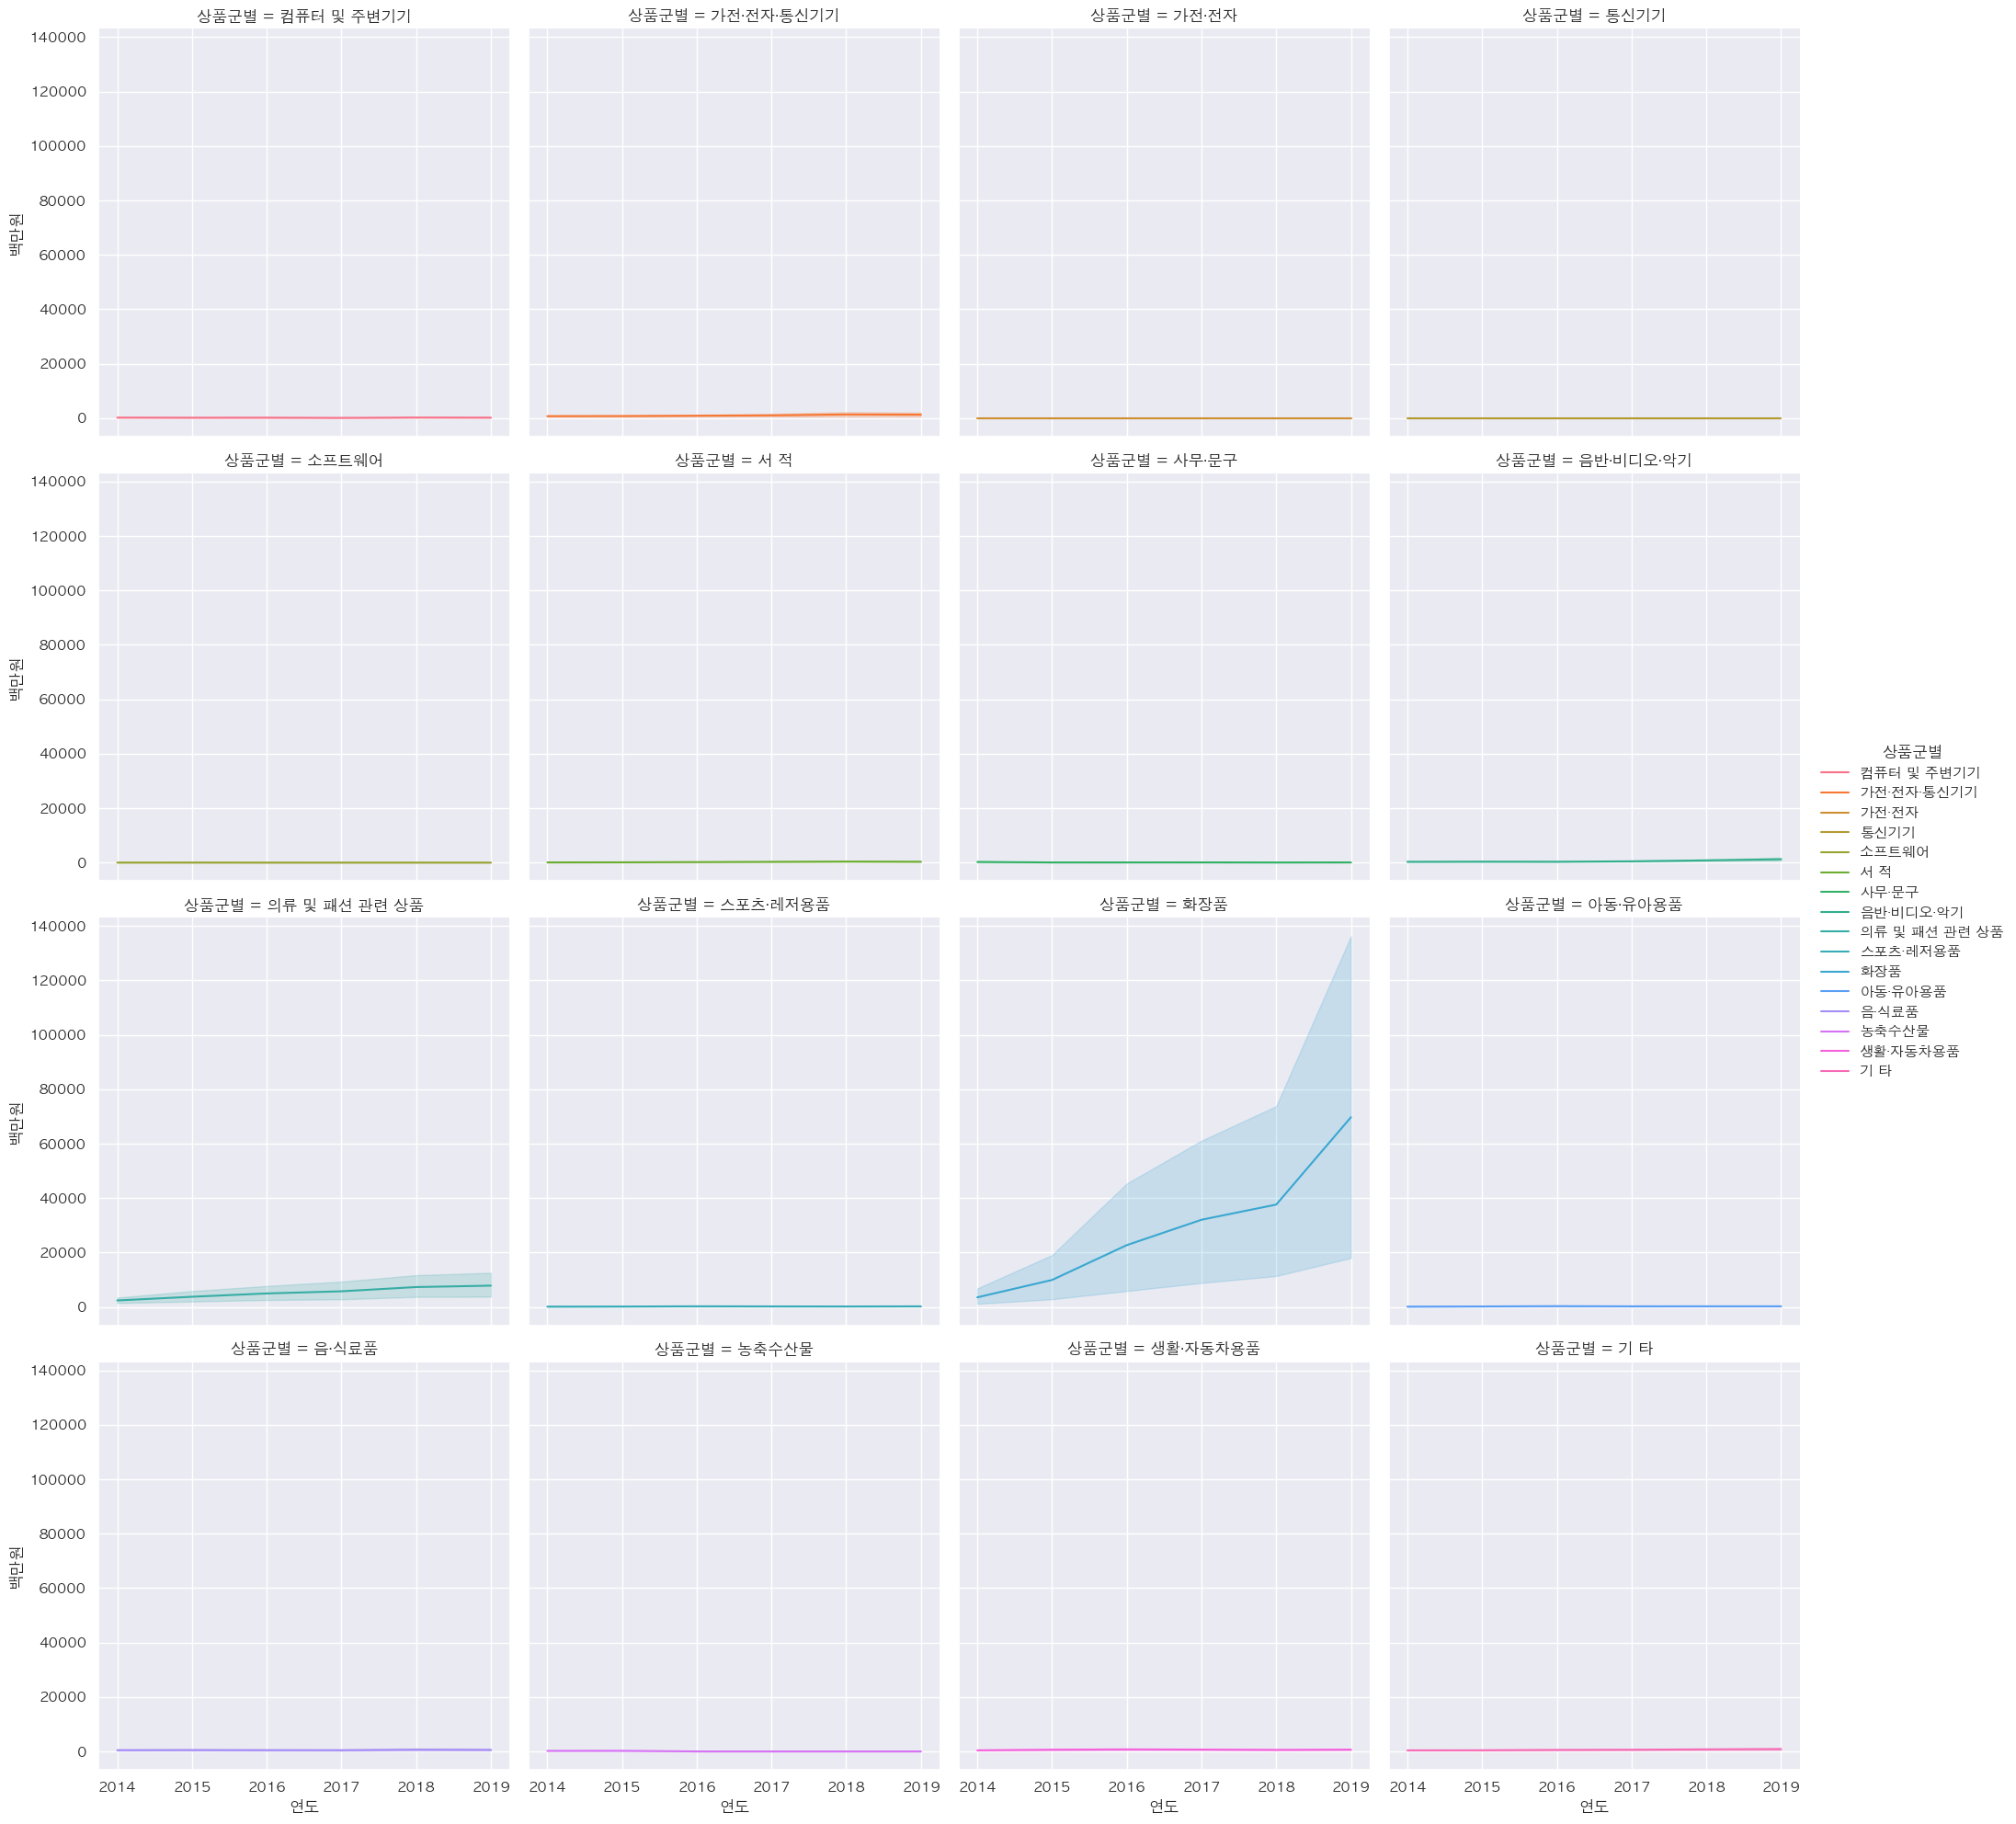

In [31]:
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

### 4.2 상품군별 판매액이 높은 순을 제거한 데이터프레임 df_sub를 만들어 차순위 상품군을 찾는 시각화 

- 화장품
- 의류 및 패션 관련 상품
- 가전 전자 통신기기
- 음반 비디오 악기

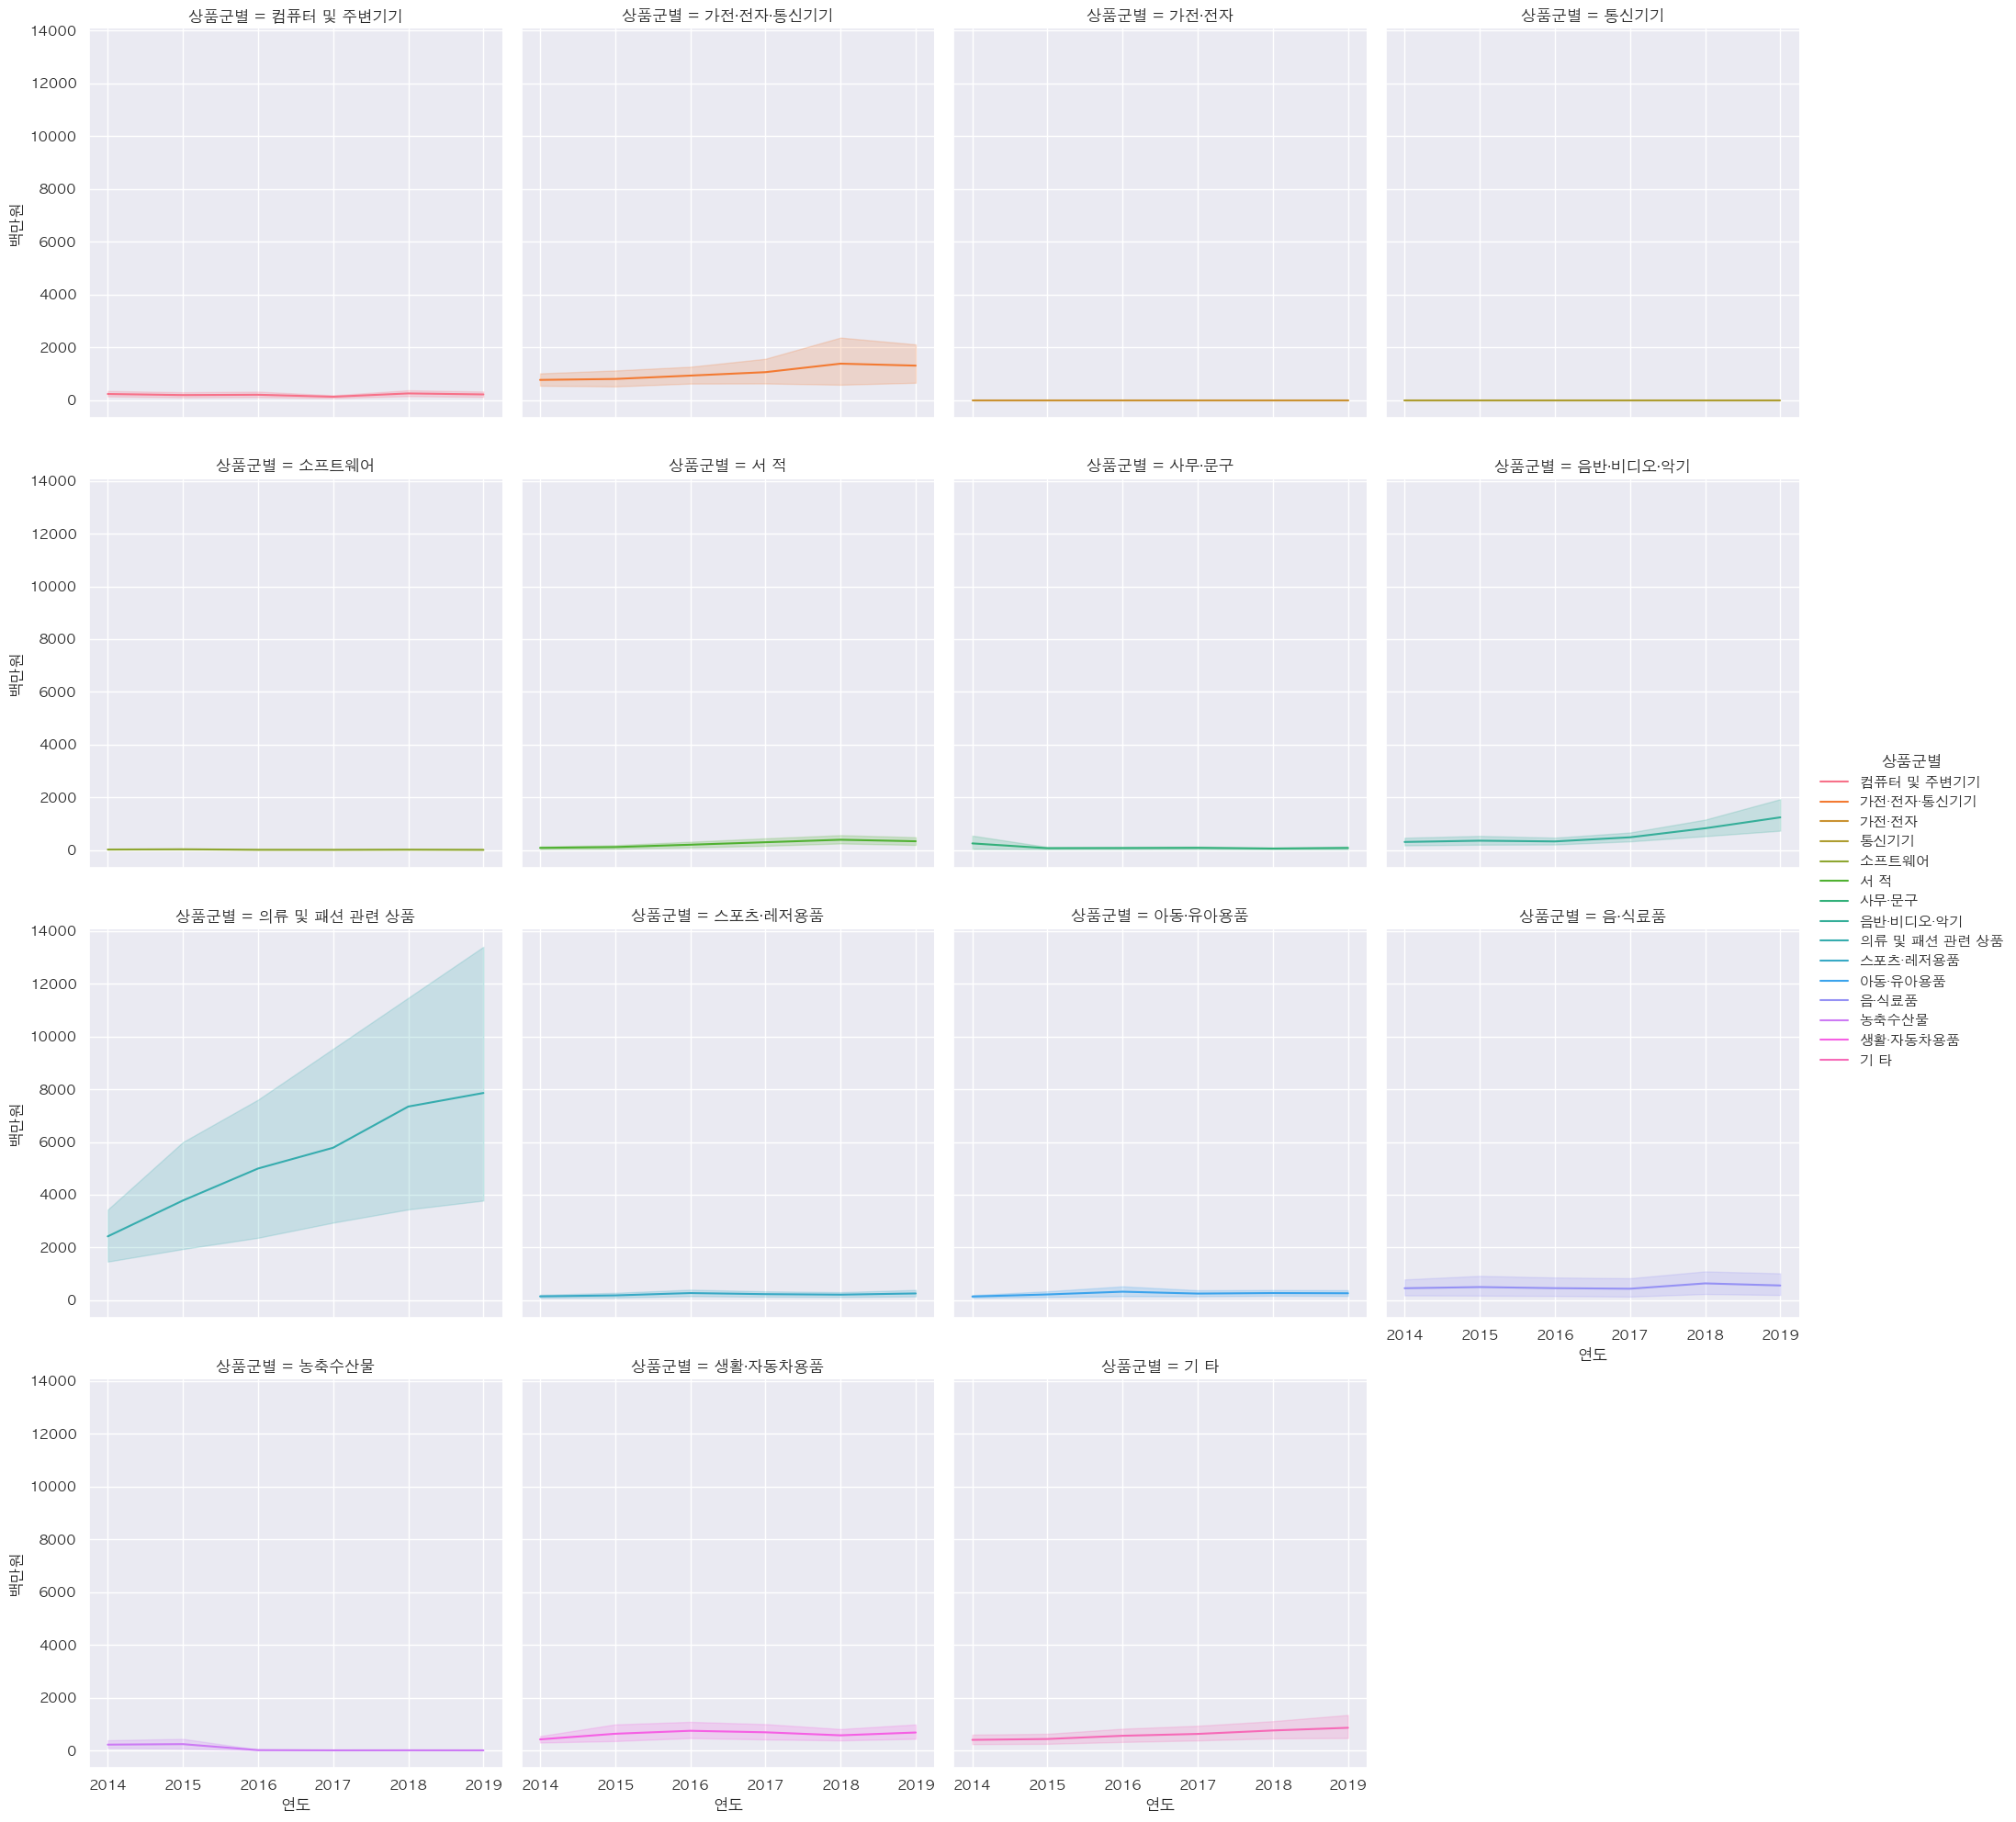

In [32]:
# 같은 의미: df_sub = df_total[~df_total.isin({'상품군별':['화장품']})]
df_sub = df_total[~df_total['상품군별'].isin(['화장품'])]

sns.relplot(data=df_sub, x='연도', y='백만원',hue='상품군별', kind='line', col_wrap=4, col='상품군별')

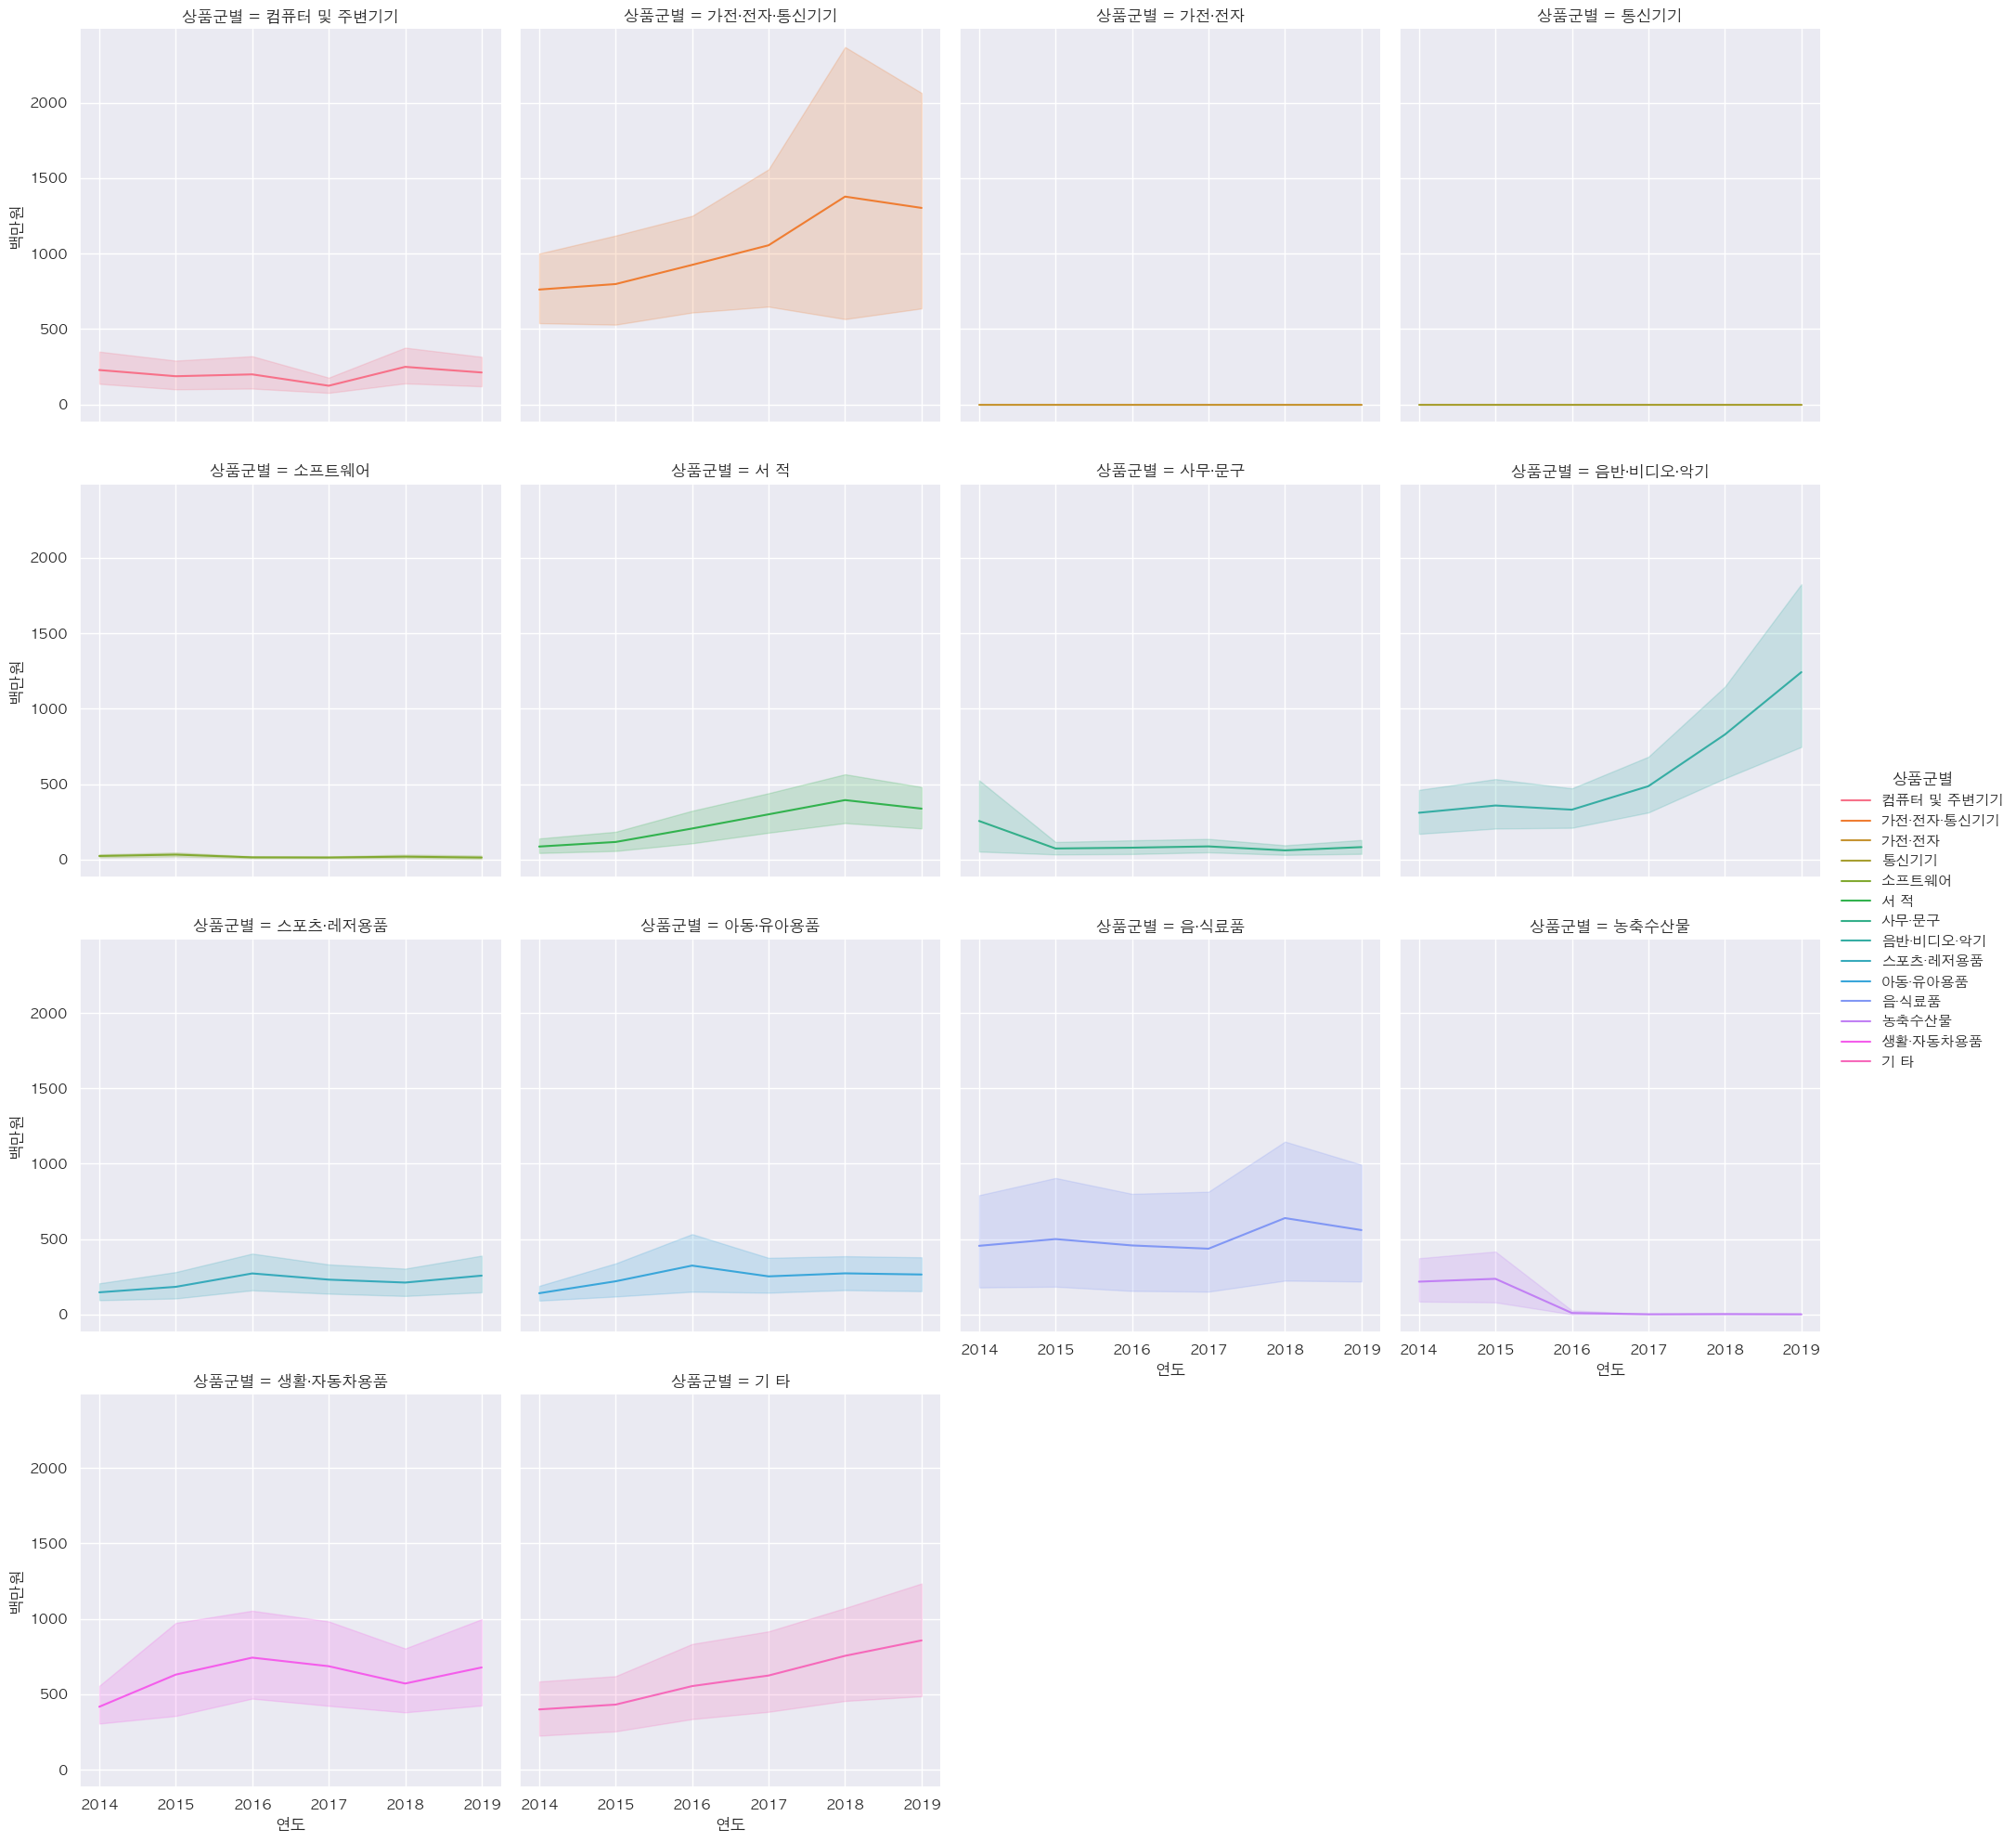

In [33]:
df_sub = df_total[~df_total.isin({'상품군별':['화장품', '의류 및 패션 관련 상품']})]

sns.relplot(data=df_sub, x='연도', y='백만원', hue='상품군별', kind='line', col_wrap=4, col='상품군별')

# 5.화장품 해외 판매액 시각화

### 5.1 분기별 화장품 판매액 데이터 시각화

In [34]:
df_cosmetic = df_total[df_total['상품군별'] == '화장품']
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
84,아시아,화장품,계,2014.1/4,0.0,2014,1
135,중국,화장품,계,2014.1/4,32235.0,2014,1
186,일본,화장품,계,2014.1/4,1034.0,2014,1
237,아세안,화장품,계,2014.1/4,398.0,2014,1
288,중동,화장품,계,2014.1/4,418.0,2014,1
...,...,...,...,...,...,...,...
23034,기타 유럽,화장품,계,2019.4/4,0.0,2019,4
23085,대양주,화장품,계,2019.4/4,1094.0,2019,4
23136,중남미,화장품,계,2019.4/4,638.0,2019,4
23187,아프리카,화장품,계,2019.4/4,0.0,2019,4


<AxesSubplot: xlabel='연도', ylabel='백만원'>

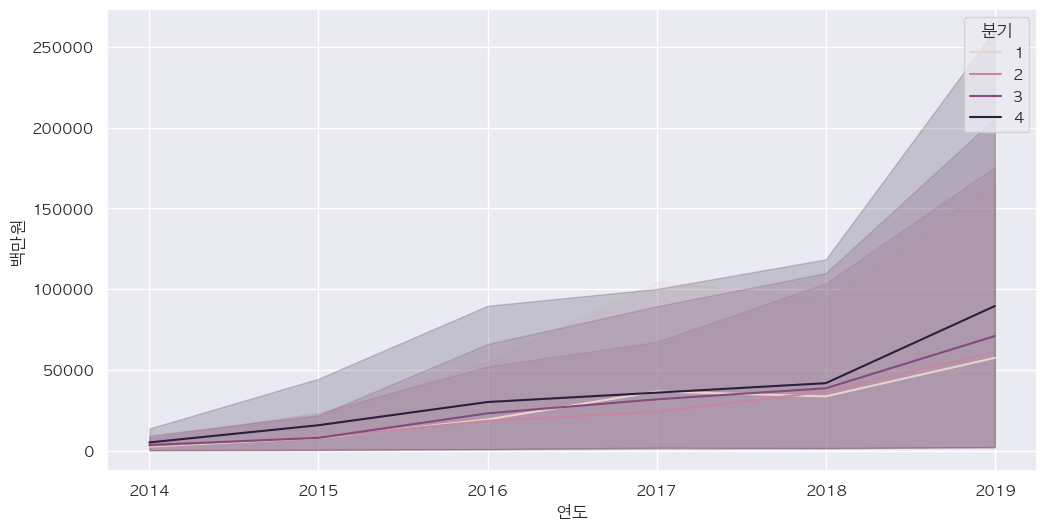

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_cosmetic, x='연도', y='백만원', hue='분기')

### 5.2 기간별 화장품 판매액 데이터 시각화

<AxesSubplot: xlabel='기간', ylabel='백만원'>

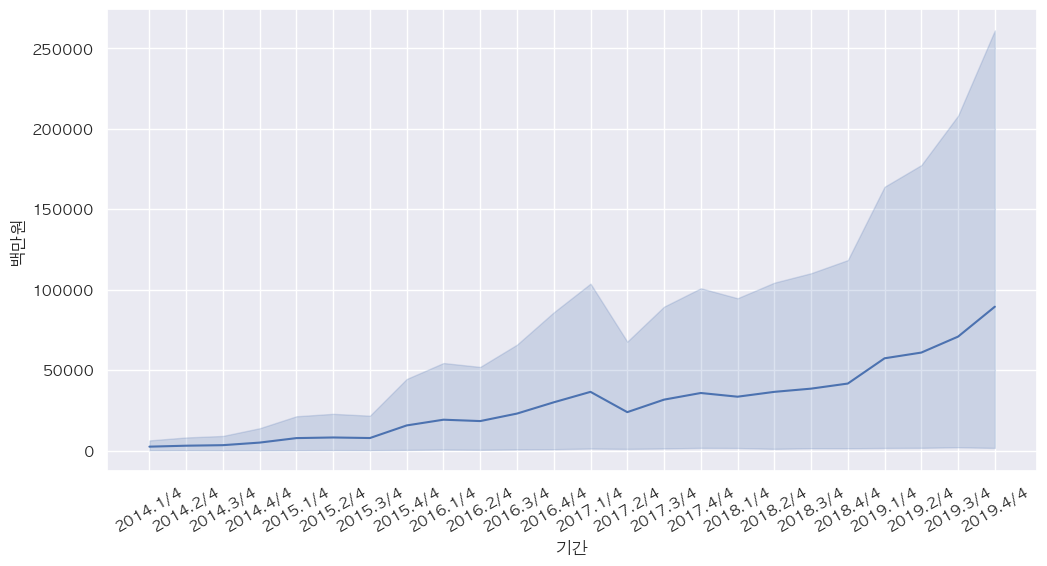

In [36]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원')

### 5.3 국가(대륙)별 기간에 따른 화장품 판매액 데이터 시각화

#### 5.3.1 df_cosmetic 데이터 사용하기

<AxesSubplot: xlabel='기간', ylabel='백만원'>

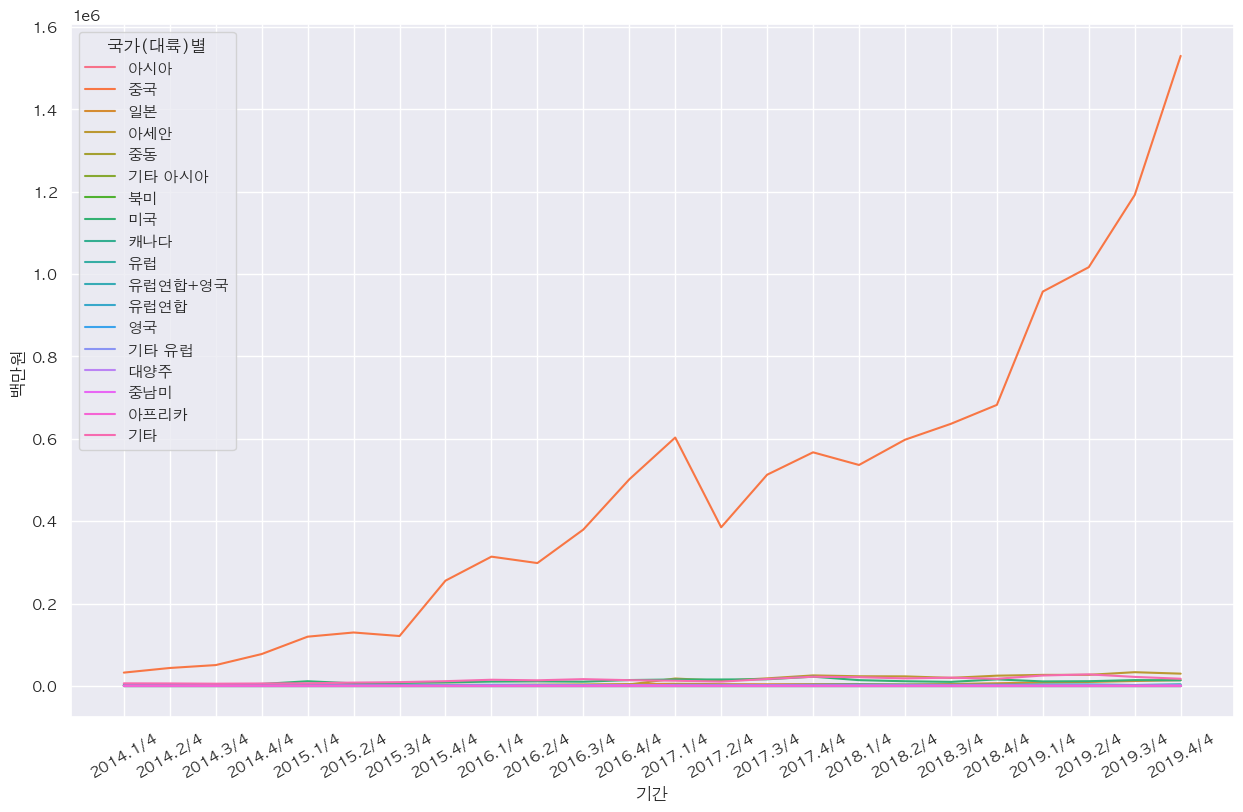

In [37]:
plt.figure(figsize=(15,9))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간', y='백만원', hue='국가(대륙)별')

#### 5.3.2 가장 높은 중국을 제거한 데이터로 대륙별 시각화
- 아세안
- 중남미

<AxesSubplot: xlabel='기간', ylabel='백만원'>

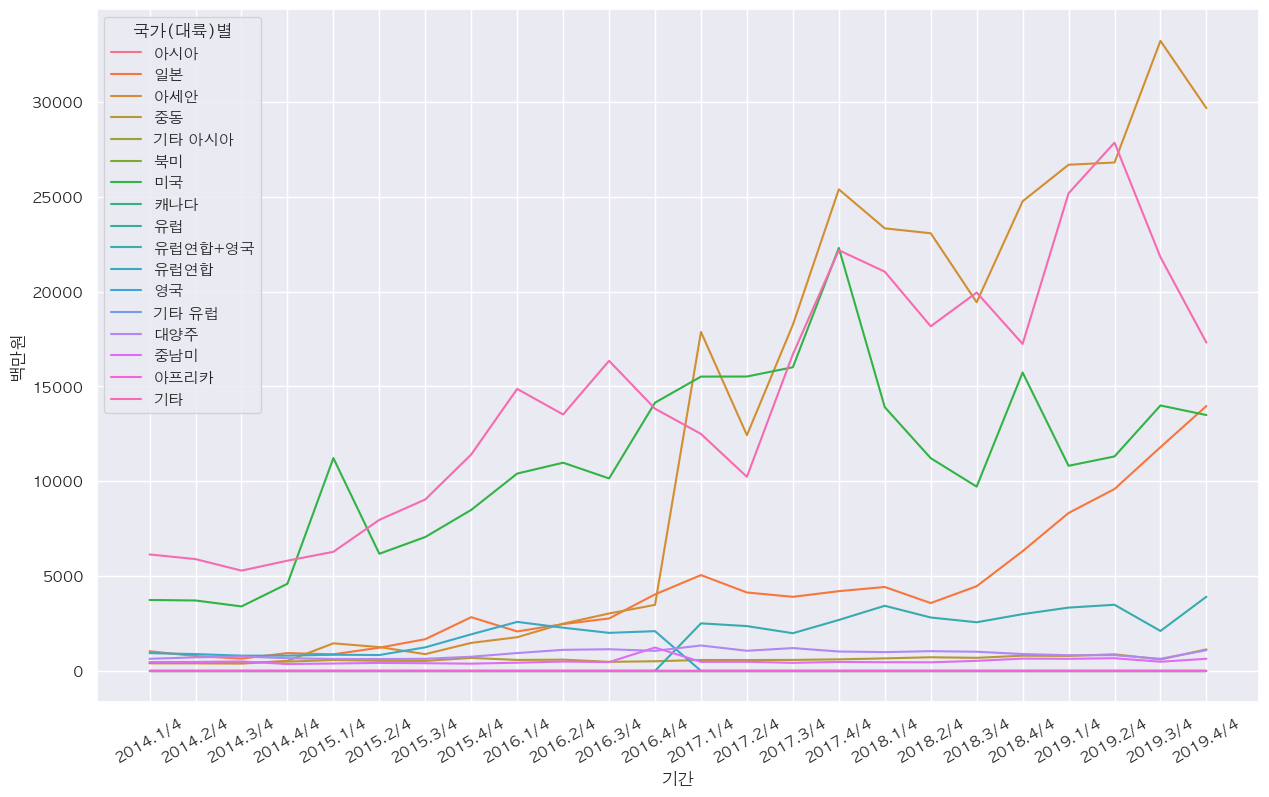

In [38]:
df_cosmetic_sub = df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국']

plt.figure(figsize=(15,9))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic_sub, x='기간', y='백만원', hue='국가(대륙)별')

### 6.패션 의류 온라인 해외 직접 판매액 시각화

#### 6.1 의류 및 패션 관련 상품의 판매액 시각화
- 판매액이 높은 국가(대륙) 순
  - 중국, 일본, 미국, 기타

In [45]:
df_fashion = df_new[df_new["상품군별"] == "의류 및 패션 관련 상품"].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
78,아시아,의류 및 패션 관련 상품,계,2014.1/4,0.0,2014,1
79,아시아,의류 및 패션 관련 상품,면세점,2014.1/4,0.0,2014,1
80,아시아,의류 및 패션 관련 상품,면세점 이외,2014.1/4,0.0,2014,1
129,중국,의류 및 패션 관련 상품,계,2014.1/4,12206.0,2014,1
130,중국,의류 및 패션 관련 상품,면세점,2014.1/4,0.0,2014,1


In [60]:
df_fashion = df_new[(df_new['상품군별'] == '의류 및 패션 관련 상품') & (df_new['판매유형별'] == '계')]
df_fashion.head(18)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
78,아시아,의류 및 패션 관련 상품,계,2014.1/4,0.0,2014,1
129,중국,의류 및 패션 관련 상품,계,2014.1/4,12206.0,2014,1
180,일본,의류 및 패션 관련 상품,계,2014.1/4,13534.0,2014,1
231,아세안,의류 및 패션 관련 상품,계,2014.1/4,3473.0,2014,1
282,중동,의류 및 패션 관련 상품,계,2014.1/4,342.0,2014,1
333,기타 아시아,의류 및 패션 관련 상품,계,2014.1/4,0.0,2014,1
384,북미,의류 및 패션 관련 상품,계,2014.1/4,0.0,2014,1
435,미국,의류 및 패션 관련 상품,계,2014.1/4,9810.0,2014,1
486,캐나다,의류 및 패션 관련 상품,계,2014.1/4,0.0,2014,1
537,유럽,의류 및 패션 관련 상품,계,2014.1/4,0.0,2014,1


<AxesSubplot: xlabel='기간', ylabel='백만원'>

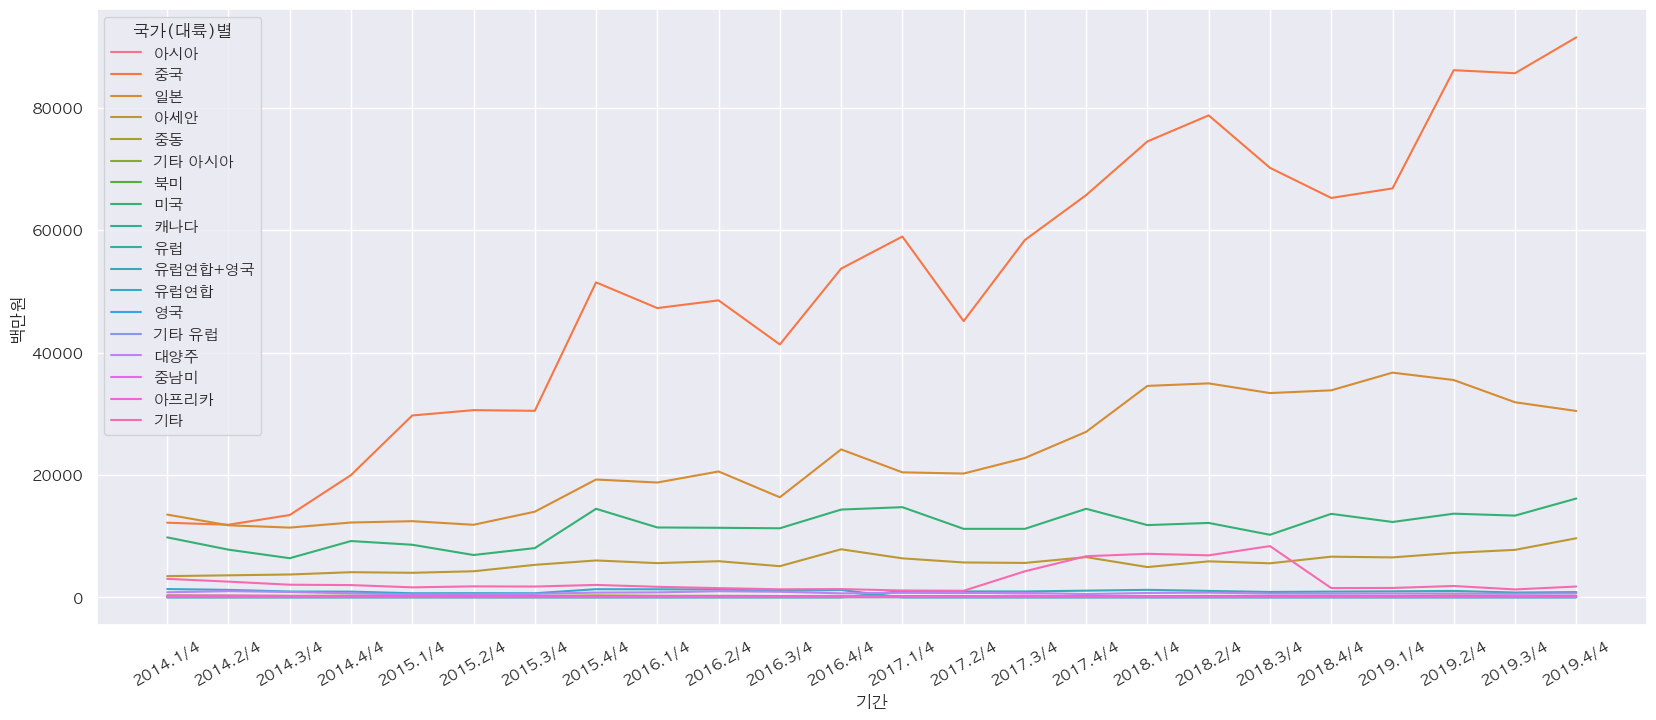

In [62]:
# 중국, 일본, 미국, 아세안
plt.figure(figsize=(20, 8))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

### 6.2 의류 및 패션 관련 상품의 판매액 heatmap 시각화
- 판매액이 높은 국가(대륙)별
  - 중국이 가장 높음
  - 일본과 미국은 점차 증가하고 있음

In [63]:
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
78,아시아,의류 및 패션 관련 상품,계,2014.1/4,0.0,2014,1
129,중국,의류 및 패션 관련 상품,계,2014.1/4,12206.0,2014,1
180,일본,의류 및 패션 관련 상품,계,2014.1/4,13534.0,2014,1
231,아세안,의류 및 패션 관련 상품,계,2014.1/4,3473.0,2014,1
282,중동,의류 및 패션 관련 상품,계,2014.1/4,342.0,2014,1
...,...,...,...,...,...,...,...
23028,기타 유럽,의류 및 패션 관련 상품,계,2019.4/4,0.0,2019,4
23079,대양주,의류 및 패션 관련 상품,계,2019.4/4,651.0,2019,4
23130,중남미,의류 및 패션 관련 상품,계,2019.4/4,124.0,2019,4
23181,아프리카,의류 및 패션 관련 상품,계,2019.4/4,0.0,2019,4


In [65]:
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc=sum)

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,13192.0,23901.0,6475.0
기타 아시아,0.0,0.0,0.0,0.0,0.0,0.0
기타 유럽,0.0,0.0,0.0,0.0,0.0,0.0
대양주,3392.0,2349.0,3401.0,2716.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,51638.0,47875.0,55536.0
북미,0.0,0.0,0.0,0.0,0.0,0.0
아세안,14936.0,19639.0,24478.0,24297.0,23068.0,31247.0
아시아,0.0,0.0,0.0,0.0,0.0,0.0
아프리카,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df_fashion1 = df_fashion[df_fashion['국가(대륙)별'].isin(['기타','대양주','미국','아세안','유럽연합','유럽연합+영국','일본','중국','중동'])]
df_fashion1



,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
129,중국,의류 및 패션 관련 상품,계,2014.1/4,12206.0,2014,1
180,일본,의류 및 패션 관련 상품,계,2014.1/4,13534.0,2014,1
231,아세안,의류 및 패션 관련 상품,계,2014.1/4,3473.0,2014,1
282,중동,의류 및 패션 관련 상품,계,2014.1/4,342.0,2014,1
435,미국,의류 및 패션 관련 상품,계,2014.1/4,9810.0,2014,1
...,...,...,...,...,...,...,...
22722,미국,의류 및 패션 관련 상품,계,2019.4/4,16161.0,2019,4
22875,유럽연합+영국,의류 및 패션 관련 상품,계,2019.4/4,862.0,2019,4
22926,유럽연합,의류 및 패션 관련 상품,계,2019.4/4,0.0,2019,4
23079,대양주,의류 및 패션 관련 상품,계,2019.4/4,651.0,2019,4


In [82]:
result = df_fashion1.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,13192.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2716.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,51638.0,47875.0,55536.0
아세안,14936.0,19639.0,24478.0,24297.0,23068.0,31247.0
유럽연합,4485.0,3374.0,4899.0,0.0,0.0,0.0
유럽연합+영국,0.0,0.0,0.0,4091.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90531.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,228330.0,288848.0,330267.0
중동,1172.0,1018.0,968.0,808.0,879.0,951.0


<AxesSubplot: xlabel='연도', ylabel='국가(대륙)별'>

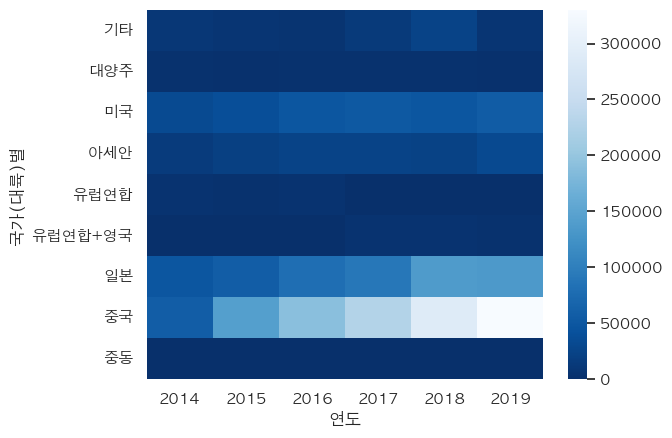

In [84]:
sns.heatmap(result, cmap = "Blues_r")

<AxesSubplot: xlabel='연도', ylabel='국가(대륙)별'>

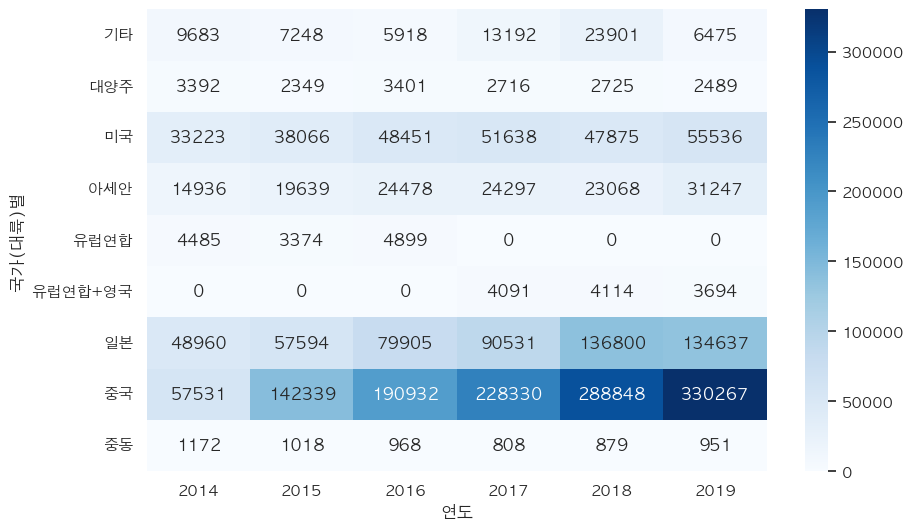

In [88]:
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

### 7.전체상품군별 시각화

In [89]:
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
54,아시아,컴퓨터 및 주변기기,계,2014.1/4,0.0,2014,1
57,아시아,가전·전자·통신기기,계,2014.1/4,0.0,2014,1
60,아시아,가전·전자,계,2014.1/4,0.0,2014,1
63,아시아,통신기기,계,2014.1/4,0.0,2014,1
66,아시아,소프트웨어,계,2014.1/4,0.0,2014,1
...,...,...,...,...,...,...,...
23241,기타,아동·유아용품,계,2019.4/4,193.0,2019,4
23244,기타,음·식료품,계,2019.4/4,319.0,2019,4
23247,기타,농축수산물,계,2019.4/4,2.0,2019,4
23250,기타,생활·자동차용품,계,2019.4/4,531.0,2019,4


<AxesSubplot: xlabel='연도', ylabel='백만원'>

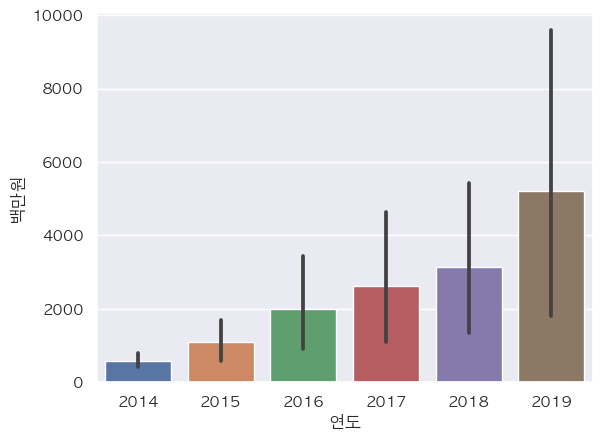

In [92]:
sns.barplot(data=df_total, x="연도", y="백만원")

#### 7.1 국가(대륙)별 lineplot

<AxesSubplot: xlabel='연도', ylabel='백만원'>

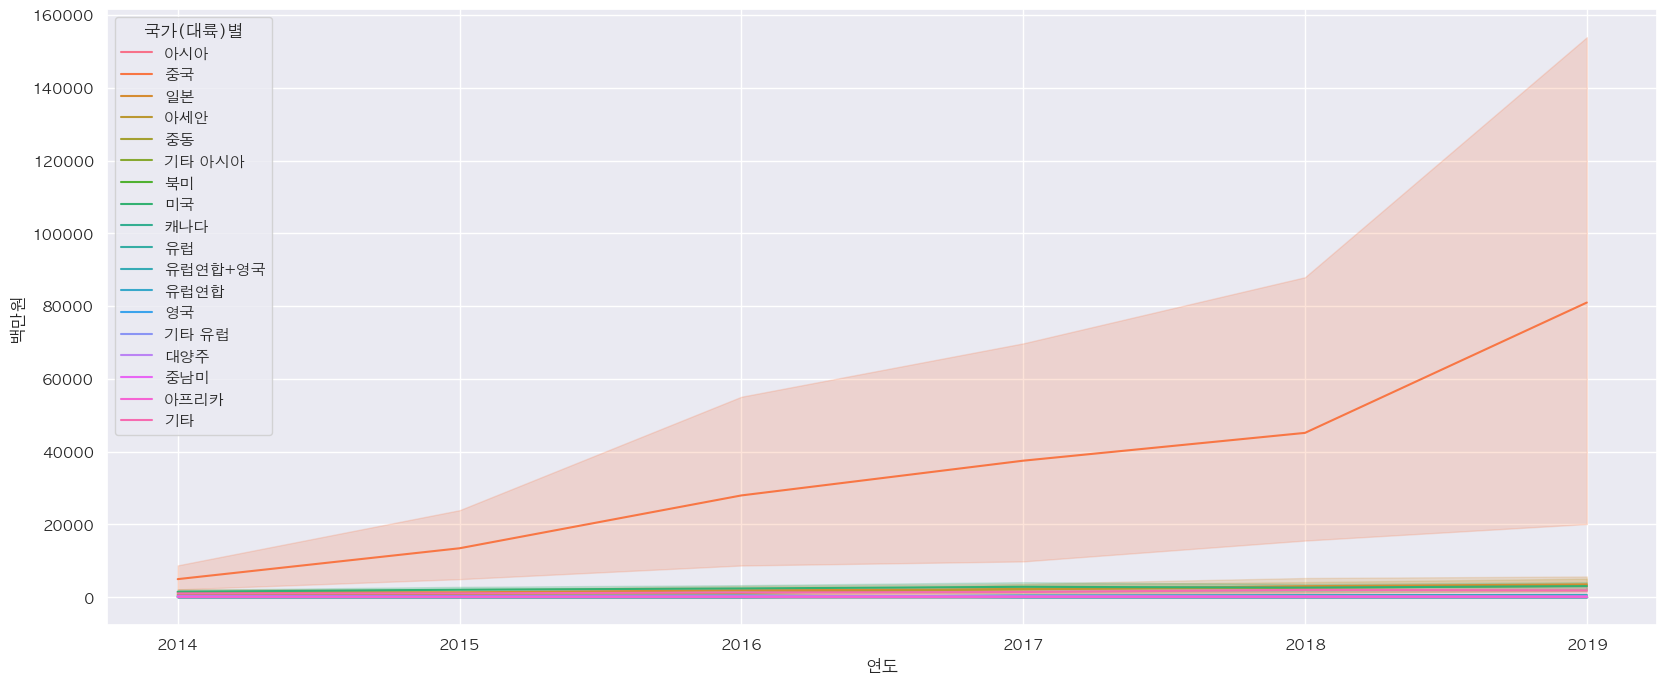

In [94]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

#### 7.2 상품군별 lineplot

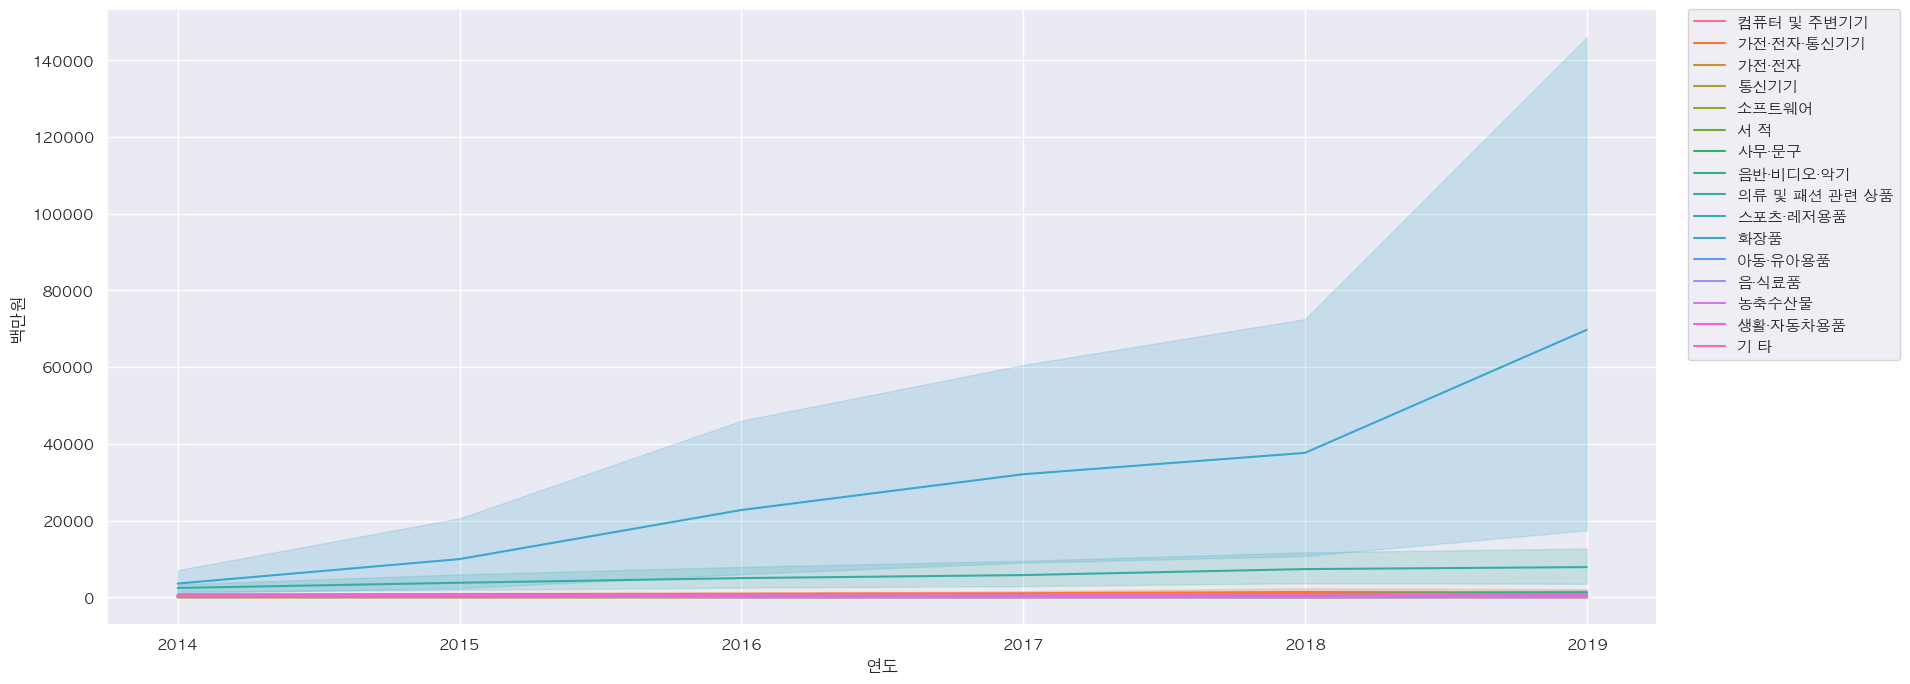

In [96]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)